In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import unicodedata
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_49013d1f7eed469aa9292258fdeec309(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_0535f2960f72ec9596c9cb8cba5514e3bab87845','domain': {'id': '389b11290ea74fb3af0c4e70414ec211'},
            'password': 'EM^n-q4&z&z[V7kZ'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

data = pd.read_csv(get_object_storage_file_with_credentials_49013d1f7eed469aa9292258fdeec309('KmeansAmazon', 'LatestData.csv'))
data.head()

/usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ASIN,ReviewerID,HelpfulNumerator,HelpfulDenomerator,Review_Text,Review_Summary,ReviewerName,Date,Ratings,Title,Genre,Genre1,Author
0,1,000100039X,A10000012B7CGYKOMPQ4L,0,0,Spiritually and mentally inspiring! A book tha...,Wonderful!\t,Adam,12-16--2012,5.0,The Prophet,Inspirational & Religious,Poetry,Kahlil Gibran
1,2,000100039X,A11TYILTAFKPR3,4,4,When Gibran was first introduced to me I had ...,A beautiful work\t,Erin Clark,01-3--2001,5.0,The Prophet,Inspirational & Religious,Poetry,Kahlil Gibran
2,3,000100039X,A12387207U8U24,0,0,As you read Gibran's poetry brings spiritual ...,Graet Work\t,Alex,03-28--2008,5.0,The Prophet,Inspirational & Religious,Poetry,Kahlil Gibran
3,4,000100039X,A12W8NRSYR593I,0,0,Jubran Kahlil Jubran had a teacher make a mist...,Classic that enjoyed reemergence in the '60's....,"DR Fredrickson """"""""David R Fredrickson""""""""",01-26--2013,5.0,The Prophet,Inspirational & Religious,Poetry,Kahlil Gibran
4,5,000100039X,A133S8CUIVRFKN,0,0,When I first started writing poetry at age 12 ...,The Prophet and then SOME!!!\t,Chase von,03-29--2008,5.0,The Prophet,Inspirational & Religious,Poetry,Kahlil Gibran


In [5]:
#Extracting only useful columns
df1 = data.iloc[:, [3,4,5,9]]
df1.head()

,HelpfulNumerator,HelpfulDenomerator,Review_Text,Ratings
0,0,0,Spiritually and mentally inspiring! A book tha...,5.0
1,4,4,When Gibran was first introduced to me I had ...,5.0
2,0,0,As you read Gibran's poetry brings spiritual ...,5.0
3,0,0,Jubran Kahlil Jubran had a teacher make a mist...,5.0
4,0,0,When I first started writing poetry at age 12 ...,5.0


In [6]:
#change data type of non-Text features from string to integer
df1.iloc[:, 1:2] = df1.iloc[:, 1:2].apply(pd.to_numeric)
pd.to_numeric(df1['Ratings'], errors='coerce')

/usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
5         5.0
6         5.0
7         5.0
8         5.0
9         1.0
10        5.0
11        5.0
12        5.0
13        4.0
14        5.0
15        5.0
16        5.0
17        5.0
18        4.0
19        5.0
20        5.0
21        5.0
22        5.0
23        5.0
24        5.0
25        5.0
26        5.0
27        5.0
28        2.0
29        5.0
         ... 
647885    2.0
647886    5.0
647887    2.0
647888    5.0
647889    5.0
647890    5.0
647891    5.0
647892    5.0
647893    5.0
647894    1.0
647895    5.0
647896    3.0
647897    5.0
647898    3.0
647899    2.0
647900    4.0
647901    4.0
647902    4.0
647903    5.0
647904    5.0
647905    5.0
647906    5.0
647907    5.0
647908    5.0
647909    5.0
647910    3.0
647911    1.0
647912    5.0
647913    5.0
647914    5.0
Name: Ratings, dtype: float64

In [7]:
#include reviews that have more than 15 helpfulness data point only
df1 = df1[(df1.HelpfulDenomerator > 15)]

In [8]:
df1['Ratings'].shape

(46907,)

In [27]:
df1.isnull().sum()

HelpfulNumerator      0
HelpfulDenomerator    0
Review_Text           0
Ratings               0
dtype: int64

In [28]:
#converting the book reviews to lower case 
df1.loc[:, 'Review_Text'] = df1['Review_Text'].str.lower()
df1["Review_Text"].head(10)

9      this man was a son of a pastor  but worshipped...
35     this is one of the first (literary) books i re...
40     certainly the words are of kahlil gibran  but ...
42     this book was given to me as a gift before i j...
49     gibran gets right down to the bedrock of what ...
59     the prophet is almustafa  called ""the chosen ...
61     i am alive like you  and i am standing beside ...
71     khalil gibran's the prophet is a truly awe ins...
78     gibran's words strike as deep and sudden as li...
104    i evidently misread the writeup  i thought it ...
Name: Review_Text, dtype: object

In [29]:
#removint the punctuation

dictionary = dict.fromkeys(i for i in range(sys.maxunicode)
                      if unicodedata.category(chr(i)).startswith('P'))
def remove_punctuation(text):
    return text.translate(dictionary)

df1['Review_Text']=df1['Review_Text'].apply( lambda x: remove_punctuation(x))
df1["Review_Text"].head(4)

9     this man was a son of a pastor  but worshipped...
35    this is one of the first literary books i reca...
40    certainly the words are of kahlil gibran  but ...
42    this book was given to me as a gift before i j...
Name: Review_Text, dtype: object

In [40]:
df1['Ratings'].shape

(46907,)

In [9]:
#transform Helpfulness into a binary variable with 0.50 ratio
df1.loc[:, 'Helpfulness'] = np.where(df1.loc[:, 'HelpfulNumerator'] / df1.loc[:, 'HelpfulDenomerator'] > 0.50, 1, 0)
df1.head(3)

,HelpfulNumerator,HelpfulDenomerator,Review_Text,Ratings,Helpfulness
9,0,27,This man was a son of a pastor but worshipped...,1.0,0
35,81,92,This is one of the first (literary) books I re...,5.0,1
42,19,25,This book was given to me as a gift before I j...,5.0,1


In [10]:
df1.groupby('Helpfulness').count()

,HelpfulNumerator,HelpfulDenomerator,Review_Text,Ratings
Helpfulness,,,,
0,10926,10926,10926,10926
1,35981,35981,35981,35981


In [11]:
df1.corr()

,HelpfulNumerator,HelpfulDenomerator,Ratings,Helpfulness
HelpfulNumerator,1.000000,0.968204,0.085496,0.155268
HelpfulDenomerator,0.968204,1.000000,-0.009486,0.031488
Ratings,0.085496,-0.009486,1.000000,0.449498
Helpfulness,0.155268,0.031488,0.449498,1.000000


In [12]:
#make a copy
df2 = df1.copy(deep = True)

In [13]:
df2.head()

,HelpfulNumerator,HelpfulDenomerator,Review_Text,Ratings,Helpfulness
9,0,27,This man was a son of a pastor but worshipped...,1.0,0
35,81,92,This is one of the first (literary) books I re...,5.0,1
42,19,25,This book was given to me as a gift before I j...,5.0,1
49,97,103,Gibran gets right down to the bedrock of what ...,5.0,1
59,11,40,"The Prophet is Almustafa called """"the chosen ...",1.0,0


In [14]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.1, max_df=0.9,
                             ngram_range=(1, 4), 
                             stop_words='english')
vectorizer.fit(df2['Review_Text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.1,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [15]:
trainingdata = vectorizer.transform(df2['Review_Text'])
vocabulary = vectorizer.get_feature_names()

In [ ]:
#find best logistic regression parameters
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
feature_set = trainingdata
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.StratifiedKFold(df1.Helpfulness,n_folds=10),
    scoring='roc_auc'
)


gs.fit(trainingdata, df2.Helpfulness)
gs.grid_scores_

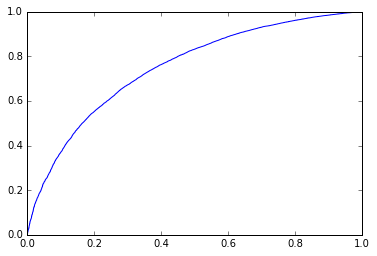

In [20]:
#plot ROC/AUC curve
from sklearn.metrics import roc_auc_score, roc_curve
actuals = gs.predict(feature_set) 
probas = gs.predict_proba(feature_set)
plt.plot(roc_curve(df2[['Helpfulness']], probas[:,1])[0], roc_curve(df2[['Helpfulness']], probas[:,1])[1])

In [21]:
# ROC/AUC score
#Accuracy of bag of Words Model is 75 Percent
y_score = probas
test2 = np.array(list(df2.Helpfulness))
y_true = test2
roc_auc_score(y_true, y_score[:,1].T)

0.75004537957503881

In [25]:
#Used tfidf to Analyze text..
model = KMeans(n_clusters=5, init='k-means++', max_iter=50, n_init=1,random_state=3)

vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(df1['Review_Text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.05,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [26]:
training = vectorizer.transform(df1['Review_Text'])
vocabulary = vectorizer.get_feature_names()
sse_err = []

In [35]:
res = model.fit(training)
vocabulary = np.array(vocabulary)
cluster_centers = np.array(res.cluster_centers_)
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]
topwords=set()
for i in range(len(res.cluster_centers_)):
    topwords = topwords.union(set(vocabulary[sorted_vals[i][-15:]]))
topwords=list(topwords)

In [36]:
#Displaying the top 15 words per clusters
words

['quot',
 'new',
 'characters',
 'reading',
 'like',
 'good',
 'books',
 'character',
 'love',
 'life',
 'history',
 'time',
 'work',
 'really',
 'don',
 'american',
 'read',
 'story',
 'just',
 'plot',
 'novel',
 'world',
 'war',
 'book',
 'read book',
 'people',
 'author',
 've']

In [38]:
train_set=training[:,[np.argwhere(vocabulary==i)[0][0] for i in words]]

In [39]:
#Cluster wise count
df1['cluster'] = model.labels_
df1.groupby('cluster').count()

,HelpfulNumerator,HelpfulDenomerator,Review_Text,Ratings,Helpfulness
cluster,,,,,
0,15183,15183,15183,15183,15183
1,6671,6671,6671,6671,6671
2,8921,8921,8921,8921,8921
3,3233,3233,3233,3233,3233
4,12899,12899,12899,12899,12899


In [50]:
# what does each cluster look like
df1.groupby('cluster').mean()

,HelpfulNumerator,HelpfulDenomerator,Ratings,Helpful
cluster,,,,
0,28.356535,35.838650,3.339501,0.826959
1,32.078520,39.280505,3.560830,0.861191
2,29.187693,41.786739,3.659148,0.752707
3,26.451670,37.287162,3.317517,0.734999


In [51]:
#final 
df1.corr()

,HelpfulNumerator,HelpfulDenomerator,Ratings,Helpful,cluster
HelpfulNumerator,1.000000,0.968612,0.065197,0.136253,-0.011519
HelpfulDenomerator,0.968612,1.000000,-0.021008,0.023769,0.006480
Ratings,0.065197,-0.021008,1.000000,0.405803,-0.004484
Helpful,0.136253,0.023769,0.405803,1.000000,-0.089340
cluster,-0.011519,0.006480,-0.004484,-0.089340,1.000000


In [42]:
#add Score column to top words
import scipy as scipy

topscore = np.array(list(df1.Ratings))
topscore = topscore.reshape(46907, 1)
features = scipy.sparse.hstack((train_set,scipy.sparse.csr_matrix(topscore)))
features = scipy.sparse.csr_matrix(features)

In [44]:
#Logistic Regression and get GridSearchCV 
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
feature_set = features
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.StratifiedKFold(df1.Helpfulness,n_folds=10),
    scoring='roc_auc'
)
gs.fit(features, df1.Helpfulness)
gs.grid_scores_

[mean: 0.81494, std: 0.03912, params: {'C': 100000, 'class_weight': None},
 mean: 0.81481, std: 0.03897, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.81494, std: 0.03912, params: {'C': 10000, 'class_weight': None},
 mean: 0.81481, std: 0.03897, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.81494, std: 0.03912, params: {'C': 1000, 'class_weight': None},
 mean: 0.81481, std: 0.03897, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.81494, std: 0.03913, params: {'C': 100, 'class_weight': None},
 mean: 0.81481, std: 0.03897, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.81495, std: 0.03915, params: {'C': 10, 'class_weight': None},
 mean: 0.81481, std: 0.03898, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.81495, std: 0.03937, params: {'C': 1, 'class_weight': None},
 mean: 0.81482, std: 0.03915, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.81412, std: 0.04079, params: {'C': 0.1, 'class_weight': None},
 mean: 0.81441, std: 0

In [72]:
print(gs.best_estimator_)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [45]:
predictor = gs.predict(feature_set)

In [46]:
#Calculating the coefficients P-value 
print(gs.best_estimator_.coef_)
print(gs.best_estimator_.intercept_)

[[ 1.16276075  1.55454412  1.56919609  0.29325035  0.75846148  0.09773343
   0.92842677  1.91345221  0.7422566   2.33070986  0.56390817  1.12046807
   2.04748783  1.13503282  0.09965841 -0.33220443 -0.6556466   1.75733109
   0.765075    1.72990172  1.87066109  0.40865494  0.24795276  1.82285502
  -1.45170623  0.16887427  1.42407169  1.29904174  0.73301318]]
[-1.93992141]


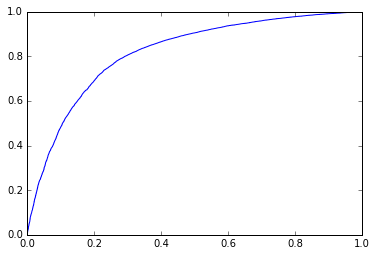

In [47]:
#roc curve
from sklearn.metrics import roc_auc_score, roc_curve
actuals = gs.predict(feature_set) 
probas = gs.predict_proba(feature_set)
plt.plot(roc_curve(df1[['Helpfulness']], probas[:,1])[0], roc_curve(df1[['Helpfulness']], probas[:,1])[1])

In [50]:

#roc auc score
y_score = probas
test2 = np.array(list(df1.Helpfulness))
test2 = test2.reshape(46907,1)
y_true = test2

roc_auc_score(y_true, y_score[:,1].T)

0.81728574200257609

[[ 4898  6028]
 [ 2808 33173]]


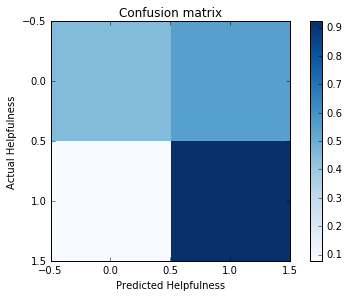

In [53]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('Actual Helpfulness')
    plt.xlabel('Predicted Helpfulness')

# Compute confusion matrix
cm = confusion_matrix(y_true, predictor)
np.set_printoptions(precision=2)
print(cm)
plt.figure()
# plot_confusion_matrix(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, title='Confusion matrix')
plt.figure()

plt.show()

In [57]:
#Displayin the top parameters
words.extend(['topscore'])
sorted(zip(topwords,gs.best_estimator_.coef_[0]),key=lambda x:x[1])

[('years', -1.4517062337490938),
 ('read book', -0.65564660289473486),
 ('book', -0.33220442695913532),
 ('life', 0.097733434820765394),
 ('make', 0.099658412191117013),
 ('love', 0.1688742692035092),
 ('like', 0.24795276487231696),
 ('books', 0.29325034925531579),
 ('family', 0.40865494487118792),
 ('read', 0.56390817369734958),
 ('time', 0.73301317655666598),
 ('story', 0.74225660023473528),
 ('character', 0.75846148131849778),
 ('author', 0.76507499906274401),
 ('history', 0.92842676539356794),
 ('plot', 1.1204680692599365),
 ('novel', 1.1350328179437257),
 ('quot', 1.1627607462714684),
 ('great', 1.299041736152452),
 ('know', 1.4240716916070468),
 ('new', 1.5545441216921103),
 ('reading', 1.5691960894924462),
 ('characters', 1.7299017179279561),
 ('does', 1.7573310939537168),
 ('good', 1.8228550220322288),
 ('ve', 1.8706610916276731),
 ('really', 1.9134522122828601),
 ('just', 2.0474878313886276),
 ('don', 2.3307098581062005)]